In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
import os 
os.getcwd()

'C:\\Users\\rahul\\OneDrive\\Desktop\\Masters\\2nd Sem\\Elctronic nose research'

In [5]:
data = pd.read_excel("DATALOG with cleaning.xlsx", sheet_name="Combined_gases")
data.head()

,ms,Ammonia (NH3)-Echem,Nitrogen Dioxide (NO2),Ethylene,Carbon Monoxide (CO),Alcohol- Acetone,Alcohol,Ammonia (NH3)- Ethanol,Gas Type(ppm)
0,4450,8331,8278,8289,8253,63443,25731,64504,1
1,9655,8373,8214,8276,8188,63524,27681,60254,1
2,14836,8255,8126,8293,8388,63513,29028,61159,1
3,20017,8314,7945,8267,8230,63601,29817,61726,1
4,25221,8258,7773,8275,8378,63579,30233,61887,1


In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['ms', 'Gas Type(ppm)'])
y = data['Gas Type(ppm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Standardize the train value

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#train_x = scaler.fit_transform(train_inputs)
#train_x

X = scaler.fit_transform(X1)
X

array([[ 2.54290809,  1.2503754 ,  0.79244975, ..., -0.71642222,
        -0.34128939, -0.98578032],
       [ 3.02164941,  1.20416115, -0.30710415, ..., -0.3901095 ,
         0.2934257 , -6.25251865],
       [ 1.67661427,  1.14061655,  1.13077403, ..., -0.43442357,
         0.73186735, -5.13101319],
       ...,
       [ 0.95850229,  1.05179853,  1.55367938, ...,  0.79025624,
         0.32662618,  0.29186844],
       [ 0.95850229,  1.06696258,  0.28496334, ...,  0.43574366,
         0.33248509,  0.29186844],
       [ 1.4030478 ,  1.07057307,  0.1158012 , ...,  0.35920118,
         0.33606553,  0.29186844]])

## Standardize the test value

In [10]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [11]:
from sklearn.metrics import accuracy_score
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6103286384976526


NameError: name 'principal_components' is not defined

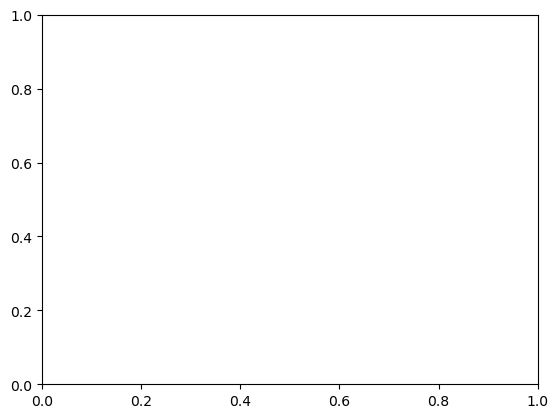

In [12]:
# Visualize the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1],c=Y['gas_type'])

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Gases")
ax.add_artist(legend1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


#scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1],c=Y['gas_type'],label=Y['gas_type'])
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.legend(labels=Y['gas_type'])

plt.show()

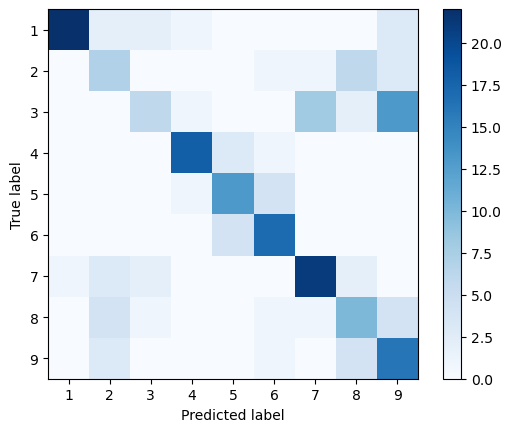

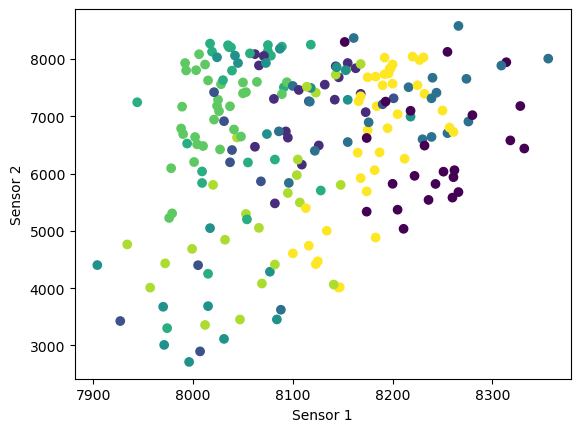

In [21]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks(range(len(set(y_test))), set(y_test))
plt.yticks(range(len(set(y_test))), set(y_test))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
plt.show()

# Plot the LDA results
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.show()


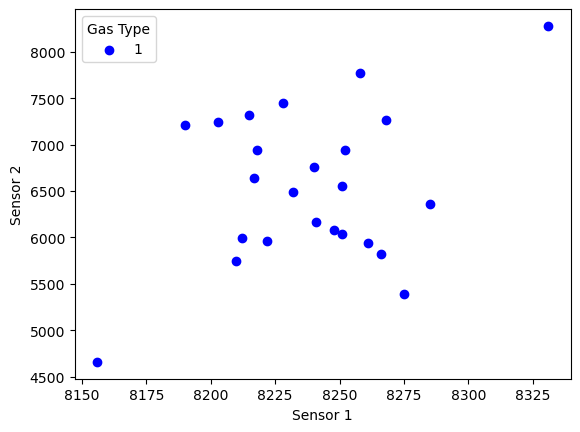

In [9]:
# Define a dictionary to map gas types to colors
gas_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purpule'
    # add more colors and gas types here
}

# Plot the LDA results
fig, ax = plt.subplots()
for gas_type in set(y_pred):
    ix = y_pred == gas_type
    ax.scatter(X_test.iloc[:, 0][ix], X_test.iloc[:, 1][ix], c=gas_colors[gas_type], label=gas_type, cmap='viridis')
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.legend(title='Gas Type')
plt.show()
